In [9]:
#imports
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random
import jinja2

reading the dataset

In [10]:
def read_csv(file_path,has_header):
    """this function is used for taking the dataset from .csv file making a test train split
    and x, y split (has header is either True or False)"""

    #reading the .csv
    if has_header:
        df = pd.read_csv(file_path, header=0, delimiter=",")  # First row as header
        print(f"Dataset shape: {df.shape}")
        print(f"Column names: {list(df.columns)}")
    else:
        df = pd.read_csv(file_path, header=None, delimiter=",")  # No header row
        print(f"Dataset shape: {df.shape}")
    
    return df


selecting the dataset

dataset_name= "beans"
df = read_csv(dataset_name + "_kmeans.csv", True)
label_column = 16
number_of_sets = 4

In [11]:
dataset_name= "diabetes"
df = read_csv(dataset_name + "_kmeans.csv", True)
label_column = 8
number_of_sets = 3

Dataset shape: (768, 9)
Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


dataset_name= "divorce"
df = read_csv(dataset_name + ".csv", True)
label_column = 54
number_of_sets = 14

dataset_name= "parkinsons"
df = read_csv(dataset_name + "_kmeans.csv", True)
df = df.drop(columns = 'name')
label_column = 16
number_of_sets = 6

dataset_name= "rice"
df = read_csv(dataset_name + "_binned_kmeans.csv", True)
label_column = 7
number_of_sets = 2

dataset_name= "wdbc"
df = read_csv(dataset_name + "_binned_kmeans.csv", True)
df = df.drop(columns = 'ID')
label_column = 0
number_of_sets = 8

making string columns numeric

In [12]:
# Find all string/object columns automatically
string_columns = df.select_dtypes(include=['object']).columns

# Encode all string columns
for column in string_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

mi for all features (graph)

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


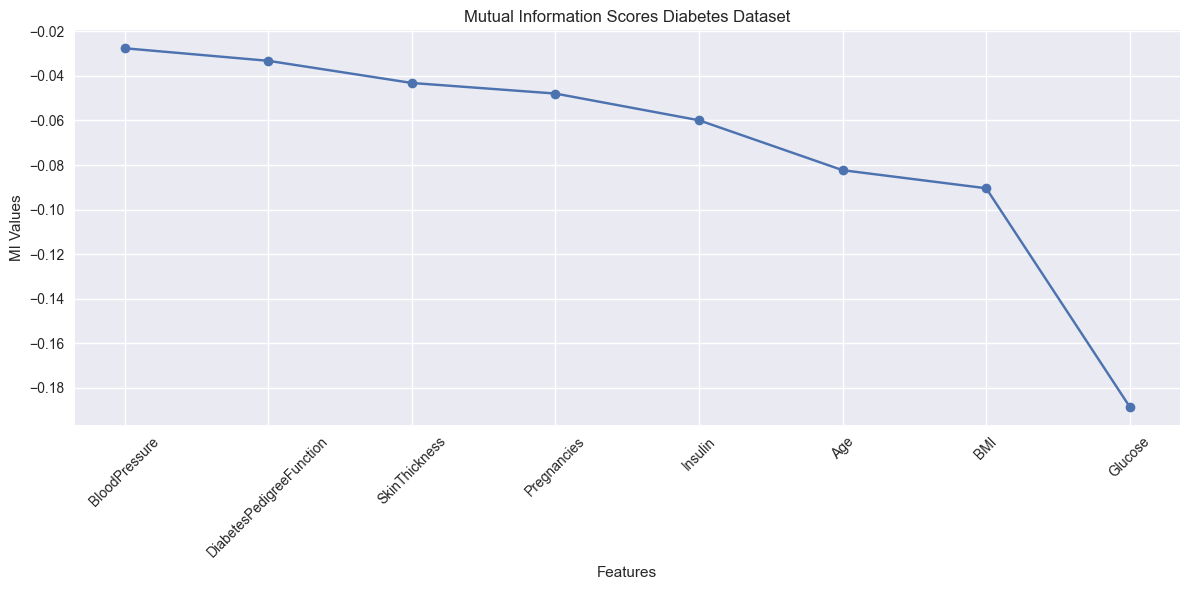

In [14]:
def mi_for_all(df_name = df, lc = label_column, title = 'complete dataset'):
    y = df_name.iloc[:, lc]
    #print(f'label is {y}')
    x = df_name.drop(df_name.columns[lc], axis=1)
    mi_scores = mutual_info_classif(x, y, discrete_features=True)
    mi_scores= mi_scores / np.log(2)



    #   ********   multiplied with -1 for the elbow method graphs
    mi_scores= mi_scores * -1

    
    mi_df = pd.DataFrame({"Feature": x.columns, "MI_Score": mi_scores}).sort_values(by="MI_Score", ascending=False)




    # Create line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(mi_df["Feature"], mi_df["MI_Score"], marker='o')
    ax.set_xlabel("Features")
    ax.set_ylabel("MI Values")
    ax.set_title(f"Mutual Information Scores {dataset_name.title()} Dataset")
    plt.style.use('seaborn-v0_8')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'mi {dataset_name} {title}.png', dpi=300, bbox_inches='tight')
    plt.show()


    return x,y,mi_df

x,y,mi_df= mi_for_all()
mi_df.to_latex(f'{dataset_name}_mi.tex', index=True, float_format='%.6f')



vertical split

# Target columns count (divide into 3 parts, take integer)
#total_columns = df.shape[1]
#target_columns_count = total_columns // 3
# Pick random feature columns from total number of columns from dataset x
#random.seed(42)
#random_cols = random.sample(range(x.shape[1]), target_columns_count - 1)
# Build target_set (label first, then random features)
#target_features = x.iloc[:, random_cols]
#target_set = pd.concat([y, target_features], axis=1)
#remaining_set = x.drop(x.columns[random_cols], axis=1)
#print("Target columns count:", target_columns_count)
#print("Selected feature indices:", random_cols)
#print(target_set.head(), "\n")
#print(remaining_set.head())

# Split the feature indices into groups
parts = np.array_split(np.arange(df.shape[1]), number_of_sets, axis=0)

# Get the first group of feature indices
#target_feature_indices = parts[0]

# Select the target features using column indices
#target_features = x.iloc[:, target_feature_indices]

# Create target set by concatenating y with target features
#target_set = pd.concat([y, target_features], axis=1)
print("Parts:")
for i, part in enumerate(parts):
    print(f"Part {i}: {part}")

target_set = None

# Find which part has the label column and get that part
for part in parts:
    if label_column in part:
        target_set = df.iloc[:, part]
        break

if target_set is not None:
    print(f"Target set shape: {target_set.shape}")
else:
    print(f"Label column {label_column} not found in any part")



#make label first column on target_set and the last column will be the lowst mi on target_set
label_col = df.columns[label_column]
col_data = target_set.pop(label_col)  # Remove the column
target_set.insert(0, label_col, col_data)  # Insert it at position 0


# Create remaining set by dropping the target feature columns
#remaining_set = x.drop(x.columns[target_feature_indices], axis=1)

#print("Selected feature indices:", target_feature_indices)

#print("Remaining set shape:", remaining_set.shape)
#print(remaining_set.head())


mi on the set with label to find the target (lowest mi)

# Get MI scores and find lowest MI column
a,b,target_mi_df = mi_for_all(df_name=target_set, lc=0, title = 'in target set')

lowest_mi_column = target_mi_df.iloc[-1]['Feature']
print(f"Column with lowest MI: {lowest_mi_column}")

# Calculate Spearman correlations
lowest_mi_data = target_set[lowest_mi_column]
print(f"lowest_mi_data:{lowest_mi_data}")

#x_ranked = x.rank(method='average').astype(int)
#lowest_mi_ranked = lowest_mi_data.rank(method='average').astype(int)

correlations = x.corrwith(lowest_mi_data, method='spearman')

# Convert to DataFrame and sort
mi_df = pd.DataFrame({
    'Feature': correlations.index,
    'MI_Score': correlations.abs().values
}).sort_values('MI_Score', ascending=False)

# Remove the column that correlates with itself
mi_df = mi_df[mi_df['Feature'] != lowest_mi_column]


print(f"Spearman correlations between '{lowest_mi_column}' and x:")
print(mi_df)

# Create line plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mi_df["Feature"], mi_df["MI_Score"], marker='o')
ax.set_xlabel("Features")
ax.set_ylabel("Abs. Corrolation Values")
ax.set_title(f"Target= {lowest_mi_column} Feature Corrolations {dataset_name.title()} Dataset")
plt.style.use('seaborn-v0_8')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{dataset_name} spearman correlation.png', dpi=300, bbox_inches='tight')
plt.show()

mi_df.to_latex(f'{dataset_name}_corr.tex', index=True, float_format='%.6f')

mi_df['MI_Score'] = mi_df['MI_Score'].diff(-1)
mi_df['MI_Score'] = mi_df['MI_Score'] +1
print(mi_df)
mi_df['MI_Score'] = mi_df['MI_Score'] / mi_df['MI_Score'].shift(1)

mi_df['MI_Score'] = mi_df['MI_Score'] -1
mi_df['MI_Score'] = mi_df['MI_Score'] * 100

print(mi_df)

OLD LOGIC

#mi_df['MI_Score'] = mi_df['MI_Score'] * -1

mi_df['MI_Score'] = mi_df['MI_Score'].diff(-1)
mi_df['MI_Score'] = mi_df['MI_Score'] +1
print(mi_df)
mi_df['MI_Score'] = mi_df['MI_Score'] / mi_df['MI_Score'].shift(1)

mi_df['MI_Score'] = mi_df['MI_Score'] -1
mi_df['MI_Score'] = mi_df['MI_Score'] * 100

print(mi_df)

mi_df = mi_df.reset_index(drop=True)
mi_df['diffrence'] = mi_df['MI_Score'].diff(1)
mi_df['change'] = mi_df['diffrence'].diff(1) * -1
print(mi_df)
drop_idx = np.argmax(mi_df['change'])
print(drop_idx)

In [15]:
mi_df = mi_df.reset_index(drop=True)
mi_df['diffrence'] = mi_df['MI_Score'].diff(1)
mi_df['change'] = mi_df['diffrence'].diff(-1)
print(mi_df)
print(np.argmin(mi_df['change']))


d = len(mi_df)

start_idx = int(np.ceil(0.10 * d))
end_idx   = int(np.floor(0.50 * d))

mi_df['is_candidate'] = False
mi_df.loc[start_idx:end_idx, 'is_candidate'] = True

epsilon = 5.0
delta_u = 1.0   # sensitivity of normalized rank


mi_df['em_score'] = 0.0
mi_df['em_probability'] = 0.0

candidates = mi_df[mi_df['is_candidate'] & mi_df['change'].notna()]

# Rank 1 = best, n = worst
ranks = candidates['change'].rank(ascending=False, method='min')
n = len(ranks)
normalized_rank = (n - ranks) / (n - 1)
utilities = normalized_rank.values


scores = np.exp((epsilon * utilities) / (2 * delta_u))
probs = scores / scores.sum()

mi_df.loc[candidates.index, 'em_score'] = scores
mi_df.loc[candidates.index, 'em_probability'] = probs

np.random.seed(42)

selected_index = np.random.choice(
    candidates.index,
    p=mi_df.loc[candidates.index, 'em_probability']
)
print(selected_index)

mi_df_rounded = mi_df.round(3)
print(mi_df_rounded)

# Round numeric columns to 3 decimals
df_display = mi_df_rounded.copy()
numeric_cols = ['MI_Score', 'diffrence', 'change', 'em_score', 'em_probability']
df_display[numeric_cols] = df_display[numeric_cols].round(3)

# Optional: keep only the columns you want to show
columns_to_show = ['Feature'] + numeric_cols
df_display = df_display[columns_to_show]

# Convert to string for display (so it doesn’t add extra decimals)
df_display_str = df_display.astype(str)

# Display in Jupyter/console
print(df_display_str.to_string(index=False))



                    Feature  MI_Score  diffrence    change
0             BloodPressure -0.027568        NaN       NaN
1  DiabetesPedigreeFunction -0.033205  -0.005637  0.004316
2             SkinThickness -0.043158  -0.009953 -0.005200
3               Pregnancies -0.047912  -0.004753  0.007238
4                   Insulin -0.059904  -0.011992  0.010422
5                       Age -0.082317  -0.022414 -0.014300
6                       BMI -0.090431  -0.008113  0.090035
7                   Glucose -0.188579  -0.098148       NaN
5
3
                    Feature  MI_Score  diffrence  change  is_candidate  \
0             BloodPressure    -0.028        NaN     NaN         False   
1  DiabetesPedigreeFunction    -0.033     -0.006   0.004          True   
2             SkinThickness    -0.043     -0.010  -0.005          True   
3               Pregnancies    -0.048     -0.005   0.007          True   
4                   Insulin    -0.060     -0.012   0.010          True   
5                    

In [16]:
from docx import Document

doc = Document()
doc.add_heading('Table X\nMutual Information and Exponential Mechanism Results', level=1)

table = doc.add_table(rows=1, cols=len(mi_df_rounded.columns))
table.style = 'Table Grid'

# Header row
hdr_cells = table.rows[0].cells
for i, col in enumerate(mi_df_rounded.columns):
    hdr_cells[i].text = col

# Data rows
for _, row in mi_df_rounded.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = "" if pd.isna(value) else str(value)

doc.save("emmi_beans_table.docx")


"""#mi_df['MI_Score'] = mi_df['MI_Score'] * -1
print(mi_df)

mi_df = mi_df.reset_index(drop=True)
mi_df['diffrence'] = mi_df['MI_Score'].diff(-1)
#mi_df['MI_Score'] = mi_df['MI_Score'] +1
print(mi_df)

mi_df['ratio'] = mi_df['diffrence'].shift(-1) / mi_df['diffrence']

#mi_df['MI_Score'] = mi_df['MI_Score'] -1
#mi_df['MI_Score'] = mi_df['MI_Score'] * 100

print(mi_df)
"""

df_excel = mi_df.copy()

# Flatten MultiIndex columns
if isinstance(df_excel.columns, pd.MultiIndex):
    df_excel.columns = ["_".join(map(str, c)) for c in df_excel.columns]

# Preserve index if meaningful
df_excel = df_excel.reset_index()

df_excel.to_excel(
    "diff.xlsx",
    sheet_name="beans",
    index=False,
    float_format="%.10f"
)

d = len(mi_df)

start_idx = int(np.ceil(0.10 * d))
end_idx   = int(np.floor(0.50 * d))

mi_df['is_candidate'] = False
mi_df.loc[start_idx:end_idx, 'is_candidate'] = True

epsilon = 5.0
delta_u = 1.0   # sensitivity of normalized rank


mi_df['em_score'] = 0.0
mi_df['em_probability'] = 0.0

candidates = mi_df[mi_df['is_candidate'] & mi_df['change'].notna()]

# Rank 1 = best, n = worst
ranks = candidates['change'].rank(ascending=False, method='min')
n = len(ranks)
normalized_rank = (n - ranks) / (n - 1)  # top rank -> 1, bottom -> 0

utilities = normalized_rank.values


scores = np.exp((epsilon * utilities) / (2 * delta_u))
probs = scores / scores.sum()

mi_df.loc[candidates.index, 'em_score'] = scores
mi_df.loc[candidates.index, 'em_probability'] = probs



selected_index = np.random.choice(
    candidates.index,
    p=mi_df.loc[candidates.index, 'em_probability']
)
print(selected_index)

print(mi_df)
